<a href="https://colab.research.google.com/github/ghazalna/Falcon9-Landing-Predictor/blob/main/Support_Vector_Machine(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [2]:
uploaded=files.upload()

Saving preprocessed_dataset.csv to preprocessed_dataset.csv


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('preprocessed_dataset.csv')

In [5]:
df

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6123.547647,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,525.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,677.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,500.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3170.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15600.000000,2,1,1,1,5.0,12,1,0,0,...,0,0,0,0,0,0,0,0,1,0
86,15600.000000,3,1,1,1,5.0,13,1,0,0,...,0,0,0,0,0,0,1,0,0,0
87,15600.000000,6,1,1,1,5.0,12,1,0,0,...,0,0,0,1,0,0,0,0,0,0
88,15600.000000,3,1,1,1,5.0,12,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 88 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PayloadMass                          90 non-null     float64
 1   Flights                              90 non-null     int64  
 2   GridFins                             90 non-null     int64  
 3   Reused                               90 non-null     int64  
 4   Legs                                 90 non-null     int64  
 5   Block                                90 non-null     float64
 6   ReusedCount                          90 non-null     int64  
 7   Class                                90 non-null     int64  
 8   Orbit_ES-L1                          90 non-null     int64  
 9   Orbit_GEO                            90 non-null     int64  
 10  Orbit_GTO                            90 non-null     int64  
 11  Orbit_HEO                         

### **Machine Learning Prediction**

In [25]:
X= df.drop('Class', axis=1)
y= df['Class']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20 ,random_state=101)

In [28]:
y_test.shape

(18,)

### **Support Vector Machine(SVM)**

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
svm = SVC

In [39]:
svm.fit(X_train, y_train.values.ravel())

SVC()

In [40]:
prediction_svm = svm.predict(X_test)

In [42]:
confusion_matrix_result_svm = confusion_matrix(y_test, prediction_svm)
print("Confusion Matrix:")
print(confusion_matrix_result_svm)

Confusion Matrix:
[[ 0  7]
 [ 0 11]]


In [45]:
accuracy_normalized_svm = accuracy_score(y_test, prediction_svm, normalize=True)
print("Accuracy (normalized): ", accuracy_normalized_svm)

Accuracy (normalized):  0.6111111111111112


In [46]:
accuracy_normalized_svm = accuracy_score(y_test, prediction_svm, normalize=False)
print("Accuracy (normalized): ", accuracy_normalized_svm)

Accuracy (normalized):  11


In [44]:
print("Classification Report:")
print(classification_report(y_test, prediction_svm))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.61      1.00      0.76        11

    accuracy                           0.61        18
   macro avg       0.31      0.50      0.38        18
weighted avg       0.37      0.61      0.46        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
def plot_confusion_matrix_svm(y, y_predict):
    "this function plots the confusion matrix for SVM"
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix (SVM)');
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

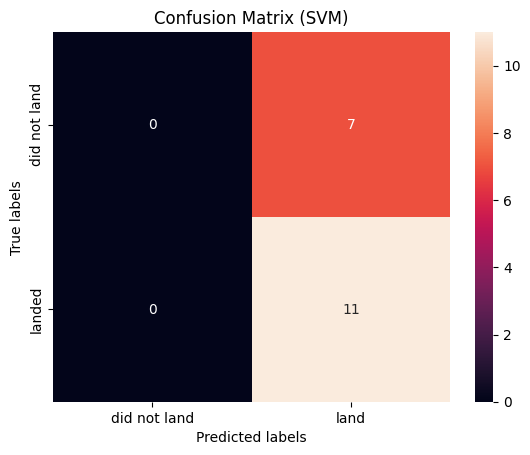

In [48]:
yhat_svm = svm.predict(X_test)
plot_confusion_matrix_svm(y_test, yhat_svm)

In [49]:
# Support Vector Machine (SVM) with GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [52]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

In [59]:
svm_cv =GridSearchCV(SVC() , parameters, cv = 10 )


In [ ]:
svm_cv.fit(X_train, y_train.values.ravel())

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

In [ ]:
prediction_4 = svm_cv.predict(X_test)

In [ ]:
prediction_4

In [ ]:
confusion_matrix (y_test,prediction_4)

In [ ]:
accuracy_score(y_test , prediction_4, normalize=False)

In [ ]:
accuracy_score(y_test , prediction_4, normalize=True)